In [4]:
from sklearn.cluster import KMeans
from scipy.stats import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from sklearn import cluster, datasets, mixture
from sklearn.base import clone

In [5]:
#import knor

In [6]:
def data_gen():
    data = []
    n = [100, 1000]
    pi = [0.5,0.5]
    for ind, num in enumerate(n): 
        data.append(binom.rvs(num, .5))
    return data
print(data_gen()[1])

482


### How do different k-means algorithms perform?

need graph of
- error vs dimension (d = 1-10) (n = 100, 1000)
- time vs dimension (d = 1-10) (n = 100, 1000)
- error vs n (n = 1, 10, 100, 1000) (d = 1)
- time vs n (n = 1, 10, 100, 1000) (d = 1)

#### 1d

In [7]:
#assumption, covariance matrices are diagonal
def gen_data(a, b, sigma1, sigma2, d=2, n=100):
    mean1 = [a]*d
    mean2 = [b]*d
    cov1 = sigma1*np.identity(d)
    cov2 = sigma2*np.identity(d)
    data_holder_0 = np.random.multivariate_normal(mean1, cov1, (n,1)).T
    data0 = np.concatenate((data_holder_0),axis=0).T
    data_holder_1 = np.random.multivariate_normal(mean2, cov2, (n,1)).T
    data1 = np.concatenate((data_holder_1),axis=0).T
    data = np.concatenate((data0, data1), axis=0)
    labels = np.concatenate(([1]*n, [0]*n), axis=0)
    return data, labels

In [8]:
def kmeans(data, labels):
    k_labels = KMeans(n_clusters=2, random_state=0).fit_predict(data)
    print(k_labels)
    #k_labels = kmeans.labels_
    return k_labels

def error_func(labels, k_labels):
    acc = np.sum(labels==k_labels)/float(len(labels))
    err = float(str(1-acc)[:6])
    return err

0.0849


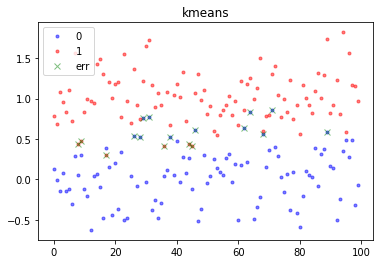

0.0849


In [11]:
data, labels = gen_data(0, 1, 0.1, 0.1, 1)
k_labels = KMeans(n_clusters=2, random_state=0).fit_predict(data)
err = error_func(labels, k_labels)
print(err)
if err > 0.8:
    k_labels = 1-k_labels
    err = error(labels, k_labels)

plt.plot(data[labels==1], 'b.', alpha=0.5, label='0')
plt.plot(data[labels==0], 'r.', alpha=0.5, label='1')

indices = [i%100 for i in np.where(k_labels!=labels)]
plt.plot(indices,data[np.where(k_labels!=labels)].T, 'gx', alpha=0.5, label='err')
plt.legend(loc='upper left')
plt.title('kmeans')
plt.show()

print(err)

#### 2d

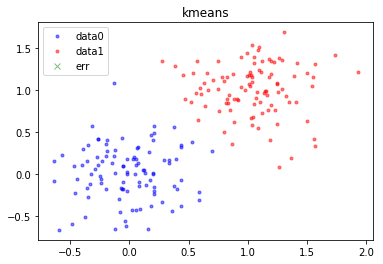

0.0


In [12]:
data, labels = gen_data(0, 1, 0.1, 0.1, 2)
k_labels = KMeans(n_clusters=2, random_state=0).fit_predict(data)
err = error_func(labels, k_labels)
if err > 0.8:
    k_labels = 1-k_labels
    err = error(labels, k_labels)

plt.plot(data[labels==1, 0], data[labels==1, 1], 'b.', alpha=0.5, label = 'data0')
plt.plot(data[labels==0, 0], data[labels==0, 1], 'r.', alpha=0.5, label = 'data1')

plt.plot(data[k_labels!=labels, 0], data[k_labels!=labels, 0], 'gx', alpha=0.5, label='err')
plt.legend(loc='upper left')
plt.title('kmeans')
plt.show()

print(err)

In [13]:
def monte_errors(n, monte_iter=100):
    errors = []
    times = []
    for d in tqdm(range(1,11)):
        monte_err = []
        monte_time = []
        for _ in range(monte_iter):
            data, labels = gen_data(0, 1, 0.1, 0.1, d, n=n)
            kmeans = KMeans(n_clusters=2, max_iter = 1)
            t0 = time.time()
            kmeans.fit_predict(data)
            t1 = time.time()
            err = error_func(labels, k_labels)
            if err > 0.8:
                k_labels = 1-k_labels
                err = error(labels, k_labels)
            monte_err.append(err)
            monte_time.append(t1-t0)
        errors.append(np.mean(monte_err))
        times.append(np.mean(monte_time))
    return errors, times

In [14]:
def monte_errors_random(n, monte_iter=100):
    errors = []
    times = []
    for d in tqdm(range(1,11)):
        monte_err = []
        monte_time = []
        for _ in range(monte_iter):
            data, labels = gen_data(0, 1, 0.1, 0.1, d, n=n)
            kmeans = KMeans(n_clusters=2, init='random')
            t0 = time.time()
            kmeans.fit_predict(data)
            t1 = time.time()
            err = error(labels, k_labels)
            if err > 0.8:
                k_labels = 1-k_labels
                err = error(labels, k_labels)
            monte_err.append(err)
            monte_time.append(t1-t0)
        errors.append(np.mean(monte_err))
        times.append(np.mean(monte_time))
    return errors, times

In [15]:
def monte_errors_spectral(n, monte_iter=100):
    errors = []
    times = []
    for d in tqdm(range(1,11)):
        monte_err = []
        monte_time = []
        for _ in range(monte_iter):
            data, labels = gen_data(0, 1, 0.1, 0.1, d, n=n)
            spectral = cluster.SpectralClustering(
                n_clusters=2, eigen_solver='arpack',affinity="nearest_neighbors")
            t0 = time.time()
            k_labels = spectral.fit_predict(data)
            t1 = time.time()
            err = error(labels, k_labels)
            if err > 0.8:
                k_labels = 1-k_labels
                err = error(labels, k_labels)
            monte_err.append(err)
            monte_time.append(t1-t0)
        errors.append(np.mean(monte_err))
        times.append(np.mean(monte_time))
    return errors, times

In [16]:
def monte_errors_gmm(n, monte_iter=100):
    errors = []
    times = []
    for d in tqdm(range(1,11)):
        monte_err = []
        monte_time = []
        for _ in range(monte_iter):
            data, labels = gen_data(0, 1, 0.1, 0.1, d, n=n)
            gmm = mixture.GaussianMixture(n_components=2, covariance_type='diag')
            t0 = time.time()
            k_labels = gmm.fit_predict(data)
            t1 = time.time()
            err = error(labels, k_labels)
            if err > 0.8:
                k_labels = 1-k_labels
                err = error(labels, k_labels)
            monte_err.append(err)
            monte_time.append(t1-t0)
        errors.append(np.mean(monte_err))
        times.append(np.mean(monte_time))
    return errors, times

In [20]:
def combined_clustering(n, monte_iter=100):
    errors = {}
    sterr = {}
    times = {}
    kmeans_rand = KMeans(n_clusters=2, init='random')
    kmeans = KMeans(n_clusters=2, max_iter = 1)
    spectral = cluster.SpectralClustering(
                n_clusters=2, eigen_solver='arpack',affinity="nearest_neighbors")
    gmm = mixture.GaussianMixture(n_components=2, covariance_type='diag')
    classifiers = (
        ('K-Means', kmeans_rand),
        ('K-Means++', kmeans),
        #('SpectralClustering', spectral),
        #('GaussianMixture', gmm)
    )
    for name, classifier in classifiers:
        errors[name] = []
        times[name] = []
        sterr[name] = []
    for d in range(1,11):
        monte_err = {}
        monte_time = {}
        monte_stderr = {}
        for name, classifier in classifiers:
            monte_err[name] = []
            monte_time[name] = []
            monte_stderr[name] = []
        for _ in range(monte_iter):
            data, labels = gen_data(0, 1, 0.1, 0.1, d, n=n)
            for name, classifier in classifiers:
                #if name=='K-Means':
                #    clf = KMeans(n_clusters=2, init='random')
                #if name=='k-Means++':
                #    clf = KMeans(n_clusters=2, max_iter = 1)
                clf = clone(classifier)
                t0 = time.time()
                clf_labels = clf.fit_predict(data)
                t1 = time.time()
                err = error_func(labels, clf_labels)
                if err > 0.8:
                    clf_labels = 1-clf_labels
                    err = error_func(labels, clf_labels)
                monte_err[name].append(err)
                mean = err
                
                monte_time[name].append(t1-t0)
        for name, classifier in classifiers:
            errors[name].append(np.mean(monte_err[name]))
            times[name].append(np.mean(monte_time[name]))
    return errors, times

In [21]:
n_errors = {}
n_times = {}
labels_n = [str(n) for n in np.logspace(4,13,10, base=2)]
for n in tqdm(np.logspace(4,13,10, base=2)):
    n = int(n)
    print(n)
    errors, times = combined_clustering(n)
    n_errors[str(n)] = errors
    n_times[str(n)] = times

  0%|          | 0/10 [00:00<?, ?it/s]

16


 10%|█         | 1/10 [00:18<02:49, 18.83s/it]

32


 20%|██        | 2/10 [00:39<02:37, 19.69s/it]

64


 30%|███       | 3/10 [01:00<02:20, 20.03s/it]

128


 40%|████      | 4/10 [01:20<02:00, 20.10s/it]

256


 50%|█████     | 5/10 [01:41<01:41, 20.38s/it]

512


 60%|██████    | 6/10 [02:05<01:23, 20.91s/it]

1024


 70%|███████   | 7/10 [02:33<01:05, 21.86s/it]

2048


 80%|████████  | 8/10 [03:07<00:46, 23.49s/it]

4096


 90%|█████████ | 9/10 [04:00<00:26, 26.70s/it]

8192


100%|██████████| 10/10 [05:19<00:00, 31.99s/it]


In [19]:
for n in n_errors:
    for clf in n_errors[n]:
        plt.plot(n_errors[n][clf], label=str(clf))
    #locs, labels = plt.xticks()
    #plt.xticks(locs, n_errors.keys())
    plt.legend()
    plt.xlabel('d')
    plt.title(n)
    plt.ylabel('error')
    plt.show()

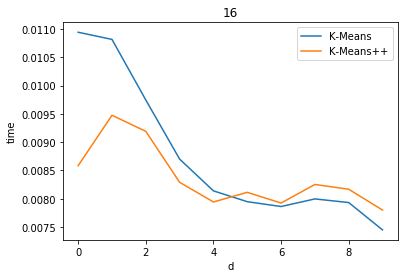

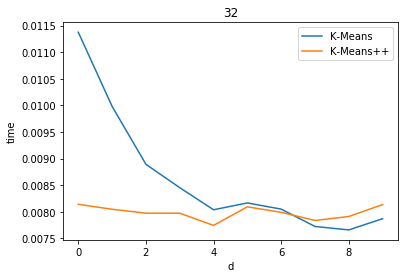

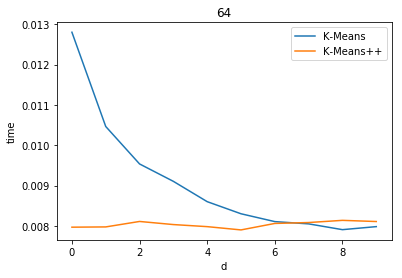

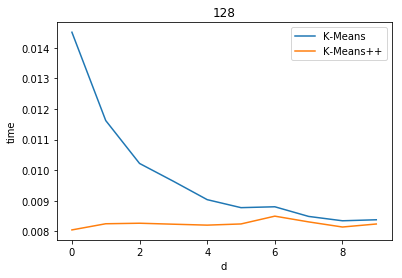

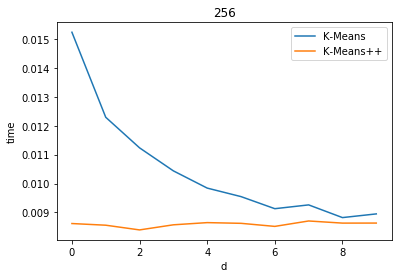

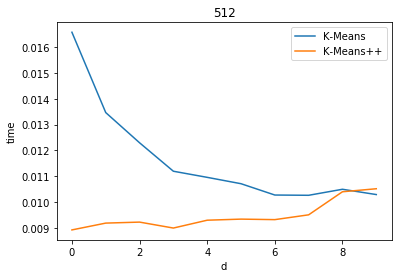

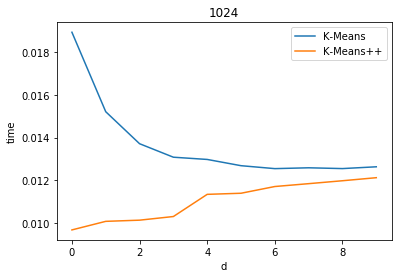

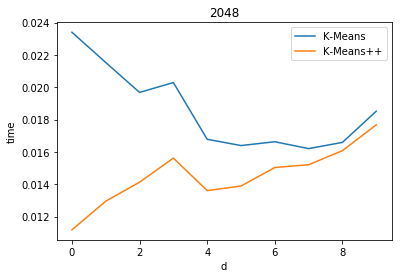

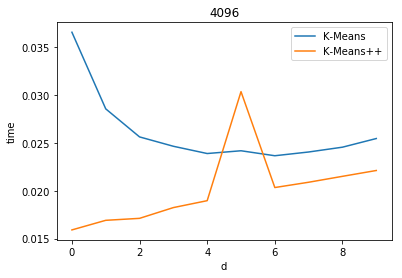

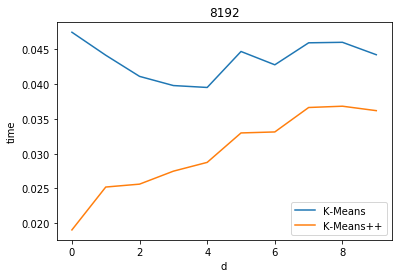

In [120]:
for n in n_errors:
    for clf in n_times[n]:
        plt.plot(n_times[n][clf], label=str(clf))
    #locs, labels = plt.xticks()
    #plt.xticks(locs, n_errors.keys())
    plt.legend()
    plt.xlabel('d')
    plt.title(n)
    plt.ylabel('time')
    plt.show()

In [73]:
for n in enumerate(np.logspace(1,5,5,base=2)):
    print(n)

(0, 2.0)
(1, 4.0)
(2, 8.0)
(3, 16.0)
(4, 32.0)


In [67]:
plt.plot(errors['K-Means'])
plt.plot(errors['K-Means++'])

locs, labels = xticks()

16
32
64
128
256
512
1024
2048
4096
8192


In [ ]:
clustering_algorithms = (
    ('K-Means', kmeans_rand),
    ('K-Means++', kmeans),
    ('SpectralClustering', spectral),
    ('GaussianMixture', gmm)
)

In [29]:
t0 = time.time()
n1 = monte_errors(1)
t1 = time.time()
n10 = monte_errors(10)
t2 = time.time()
n100 = monte_errors(100)
t3 = time.time()
n1000 = monte_errors(1000)
t4 = time.time()
n10000 = monte_errors(10000)
t5 = time.time()
n100000 = monte_errors(100000)
t6 = time.time()

100%|██████████| 10/10 [07:57<00:00, 47.73s/it]


In [30]:
t0_r = time.time()
n1_random = monte_errors_random(1)
t1_r = time.time()
n10_random = monte_errors_random(10)
t2_r = time.time()
n100_random = monte_errors_random(100)
t3_r = time.time()
n1000_random = monte_errors_random(1000)
t4_r = time.time()
n10000_random = monte_errors_random(10000)
t5_r = time.time()
n100000_random = monte_errors_random(100000)
t6_r = time.time()

100%|██████████| 10/10 [11:44<00:00, 70.42s/it]


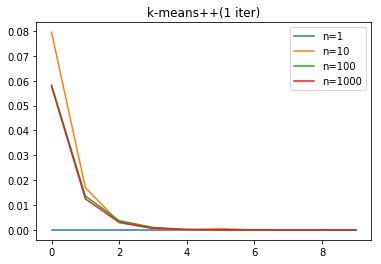

In [24]:
plt.plot(n1, label = 'n=1')
plt.plot(n10, label = 'n=10')
plt.plot(n100, label = 'n=100')
plt.plot(n1000, label = 'n=1000')
plt.title('k-means++(1 iter)')
plt.legend()
plt.show()

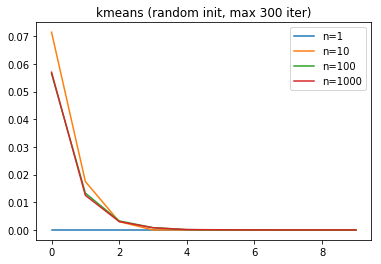

In [23]:
plt.plot(n1_random, label = 'n=1')
plt.plot(n10_random, label = 'n=10')
plt.plot(n100_random, label = 'n=100')
plt.plot(n1000_random, label = 'n=1000')
plt.title('kmeans (random init, max 300 iter)')
plt.legend()
plt.show()

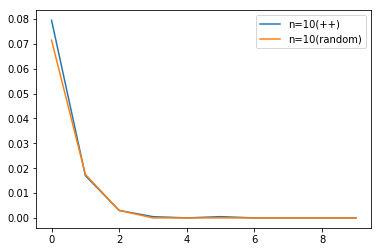

In [22]:
plt.plot(n10, label = 'n=10(++)')
plt.plot(n10_random, label = 'n=10(random)')
plt.legend()
plt.show()

In [26]:
n1e4 = monte_errors(10000)
n1e5 = monte_errors(100000)
n1e4_random = monte_errors_random(10000)
n1e5_random = monte_errors_random(100000)

100%|██████████| 10/10 [11:21<00:00, 68.18s/it]


In [27]:
n1e4 = monte_errors(10000)
n1e5 = monte_errors(100000)

100%|██████████| 10/10 [12:15<00:00, 73.59s/it]


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

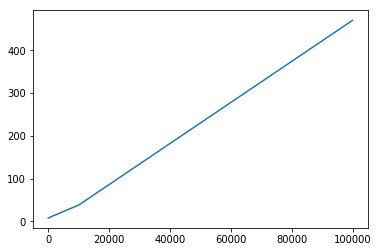

In [28]:
plt.plot([1,10,100,1000,10000,100000],[8,8,8,11, 38, 470], label='k-means (++ init)')
plt.plot([1,10,100,1000,10000,100000],[4,8,12,15, 53, 735], label='k-means (random init)')
plt.title('time for each n')
plt.legend(loc='upper left')
plt.show()
plt.plot(n1e4, label='1e4_++')
plt.plot(n1e5, label='1e5_++')
plt.plot(n1e4_random, label='1e4_random')
plt.plot(n1e5_random, label='1e5_random')
plt.show()